<a href="https://colab.research.google.com/github/AlanAmaro13/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: Amaro, Alan.

In this notebook we present two codes for linear regression using ordinary least squares (OSL) and weighted least squares (WSL)

In ordinary least squares we employed the next expressions:







1. **Model Equation**:
   $$
   y_i = \beta_0 + \beta_1 x_i + \epsilon_i
   $$

2. **Objective Function (Residual Sum of Squares, RSS)**:
   $$
   \text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
   $$

3. **Normal Equations**:
   $$
   \begin{cases}
   \sum_{i=1}^n y_i = n \beta_0 + \beta_1 \sum_{i=1}^n x_i \\
   \sum_{i=1}^n x_i y_i = \beta_0 \sum_{i=1}^n x_i + \beta_1 \sum_{i=1}^n x_i^2
   \end{cases}
   $$

4. **Estimation of Parameters**:
   - **Slope** ($( \beta_1 $)):

     $$
     \beta_1 = \frac{n \sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i\right)^2}
     $$

   - **Intercept** ($\( \beta_0 \$)):
     $$
     \beta_0 = \frac{1}{n} \sum_{i=1}^n y_i - \beta_1 \frac{1}{n} \sum_{i=1}^n x_i
     $$

5. **Predicted Values**:
  $$
   \hat{y}_i = \beta_0 + \beta_1 x_i
   $$

6. **Goodness-of-Fit (Coefficient of Determination, \( R^2 \))**:
   $$
   R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
   $$
   where Total Sum of Squares (TSS) is:
   $$
   \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2
   $$
   and $( \bar{y} )$ is the mean of the observed values:
   $$
   \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
   $$


If we have a collection of $x$ and $y$ weights for each value, we can implement the reciprocal of the variance for each observation:
$$w_{i} = \frac{1}{w_{xi} * w_{yi}} $$


12 12


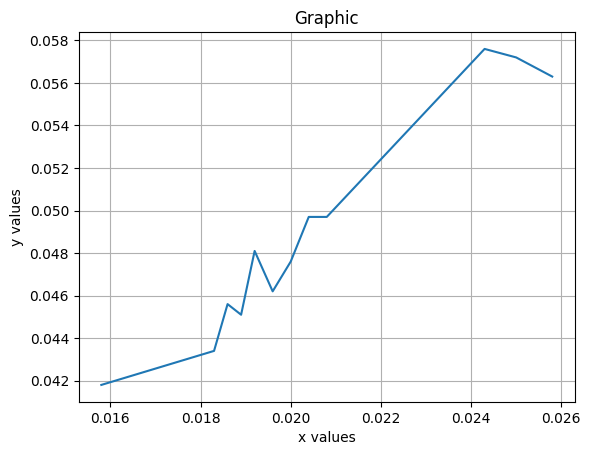

In [3]:
import matplotlib.pyplot as plt

# Here goes your x and y values
x = [0.0258,
     0.0250,
     0.0243,
     0.0208,
     0.0204,
     0.0200,
     0.0196,
     0.0192,
     0.0189,
     0.0186,
     0.0183,
     0.0158]

y = [0.0563,
     0.0572,
     0.0576,
     0.0497,
     0.0497,
     0.0476,
     0.0462,
     0.0481,
     0.0451,
     0.0456,
     0.0434,
     0.0418]

w_x = [4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4]

w_y = [4,
       4,
       8,
       6,
       2,
       4,
       1,
       1,
       2,
       1,
       1,
       1]

print(len(x), len(y))
#print(len(x), len(y), len(w_x), len(w_y))

plt.plot(x,y)
plt.title('Graphic')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid()
plt.show()

In [5]:
# This part correspons to OSL
import numpy as np

n = len(x)

x = np.array(x, dtype= np.float32)
y = np.array(y, dtype= np.float32)

## sum of the product
xy = x*y
sum_xy = np.sum(xy)

# sum of the individual sets
sum_x = np.sum(x)
sum_y = np.sum(y)

# product of the sum of individual sets
sum_x_sum_y = sum_x * sum_y

# sum of the squared individual sets
squared_x = x**2
sum_squared_x = np.sum(squared_x)

# squared of the sum
squared_sum_x = sum_x**2

# ---> Slope
b_1 = ( n * sum_xy - (sum_x_sum_y ) )/ ( n*sum_squared_x - (squared_sum_x)  )

# ---> Intersection
b_0 = (1/n) * sum_y - (b_1 / n * sum_x)

print('''The estimation for the linear equation corresponds to:

y = {:.3e} x + {:.3e}

'''.format(b_1, b_0))

# R2 coefficient:
y_p = (b_1 * x) + b_0
rss = np.sum((y - y_p)**2)

y_avg = np.sum(y)/n
tss = np.sum((y - y_avg)**2)
r2 = 1 - rss/tss

print('The R2 coefficient corresponds to: {:.3f}'.format(r2))




The estimation for the linear equation corresponds to:

y = 1.739e+00 x + 1.327e-02


The R2 coefficient corresponds to: 0.945


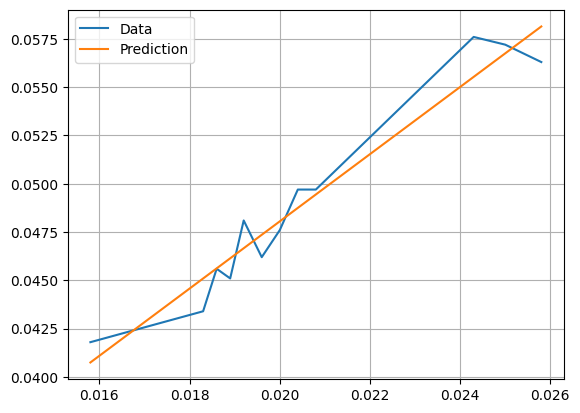

In [6]:
plt.plot(x,y, label ='Data')
plt.plot(x, y_p, label = 'Prediction')
plt.grid()
plt.legend()
plt.show()

 In Weighted Least Squares (WLS) regression, each observation is assigned a weight to account for heteroscedasticity or differing reliability of data points.

1. **Weighted Model Equation**:
   $$
   y_i = \beta_0 + \beta_1 x_i + \epsilon_i
   $$
   where each observation \(i\) is associated with a weight $(w_i$).

2. **Weighted Objective Function (Weighted Residual Sum of Squares, WRSS)**:
   $$
   \text{WRSS} = \sum_{i=1}^n w_i (y_i - \hat{y}_i)^2
   $$
   where $( \hat{y}_i = \beta_0 + \beta_1 x_i )$ is the predicted value.

3. **Weighted Normal Equations**:
   To find the optimal $(\beta_0$) and $(\beta_1$), solve the following weighted normal equations:
   $$
   \begin{cases}
   \sum_{i=1}^n w_i y_i = \beta_0 \sum_{i=1}^n w_i + \beta_1 \sum_{i=1}^n w_i x_i \\
   \sum_{i=1}^n w_i x_i y_i = \beta_0 \sum_{i=1}^n w_i x_i + \beta_1 \sum_{i=1}^n w_i x_i^2
   \end{cases}
   $$

4. **Estimation of Parameters**:
   - **Slope** ($(\beta_1)$):
     
     $$
     \beta_1 = \frac{\sum_{i=1}^n w_i x_i y_i - \left(\sum_{i=1}^n w_i x_i\right) \left(\sum_{i=1}^n w_i y_i\right) / \sum_{i=1}^n w_i}{\sum_{i=1}^n w_i x_i^2 - \left(\sum_{i=1}^n w_i x_i\right)^2 / \sum_{i=1}^n w_i}
     $$

   - **Intercept** ($(\beta_0$)):
     
     $$
     \beta_0 = \frac{1}{\sum_{i=1}^n w_i} \left(\sum_{i=1}^n w_i y_i - \beta_1 \sum_{i=1}^n w_i x_i\right)
     $$

5. **Weighted Predicted Values**:
   $$
   \hat{y}_i = \beta_0 + \beta_1 x_i
   $$

6. **Goodness-of-Fit (Weighted \( R^2 \))**:
   $$
   R^2 = 1 - \frac{\text{WRSS}}{\text{WSS}}
   $$
   where Weighted Total Sum of Squares (WSS) is:
   $$
   \text{WSS} = \sum_{i=1}^n w_i (y_i - \bar{y}_w)^2
   $$
   and $( \bar{y}_w $) is the weighted mean of the observed values:
   $$
   \bar{y}_w = \frac{\sum_{i=1}^n w_i y_i}{\sum_{i=1}^n w_i}
   $$


In [7]:
# In this part we get the slope and intercept using WSL
import numpy as np
x = [0.0258,
     0.0250,
     0.0243,
     0.0208,
     0.0204,
     0.0200,
     0.0196,
     0.0192,
     0.0189,
     0.0186,
     0.0183,
     0.0158]

y = [0.0563,
     0.0572,
     0.0576,
     0.0497,
     0.0497,
     0.0476,
     0.0462,
     0.0481,
     0.0451,
     0.0456,
     0.0434,
     0.0418]

w_x = [4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4]

w_y = [4,
       4,
       8,
       6,
       2,
       4,
       1,
       1,
       2,
       1,
       1,
       1]

x = np.array(x)
y = np.array(y)
w_x = np.array(w_x)
w_y = np.array(w_y)


w_x_w_y = w_x * w_y

w = np.array(1/w_x_w_y)

# Sum of the product wxy
wxy = x*y*w
sum_wxy = np.sum(wxy)

# Sum of the wx product
wx = w*x
sum_wx = np.sum(wx)

# Sum of the wy product
wy = w*y
sum_wy = np.sum(wy)

# Sum of w
sum_w = np.sum(w)

# Sum of w*x**2
wx2 = w*(x**2)
sum_wx2 = np.sum(wx2)

# Sum of squared wx
squared_sum_wx = (sum_wx)**2

# ---> Slope
b_1 = ((sum_wxy - (sum_wx * sum_wy) )/ sum_w) /  (( sum_wx2 - squared_sum_wx )/sum_w)

# --> Intercep
b_0 = (1/sum_w) * (sum_wy - (b_1*sum_wx))

print('''The linear approximation using WSL corresponds to;

y = {:.3e} x + {:.3e}'''.format(b_1, b_0))

# R2 coefficient

y_w = sum_wy / sum_w
wss = np.sum(  w *( y - y_w)**2 )

y_p = (b_1 * x) + b_0
wrss = np.sum( w * (y - y_p)**2 )

r2 = 1 - wrss/wss

print('The R2 coefficient corresponds to: {:.3e}'.format(r2))





The linear approximation using WSL corresponds to;

y = 2.440e+00 x + -2.780e-04
The R2 coefficient corresponds to: 7.134e-01


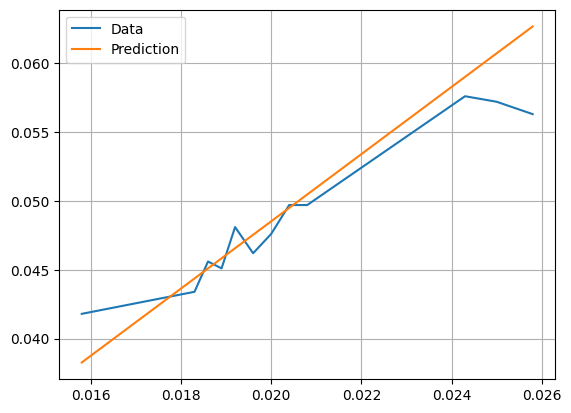

In [8]:
plt.plot(x,y, label ='Data')
plt.plot(x, y_p, label = 'Prediction')
plt.grid()
plt.legend()
plt.show()

# Test values
1) x = [1,
     2,
     3,
     5,
     6,
     8,
     9,
     10]


y = [1.5,
     2.0,
     4.0,
     4.6,
     4.7,
     8.5,
     8.8,
     8.9]

2) x = [0.0,
     2.0,
     4.0,
     6.0,
     8.0,
     10.0,
     15.0,
     20.0,
     25.0,
     30.0,
     35.0,
     40.0,
     45.0,
     45.0,
     50.0,
     55.0
     ]


y = [0.5,
     1.0,
     1.5,
     2.0,
     2.0,
     3.0,
     3.5,
     4.0,
     5.0,
     6.0,
     7.0,
     7.5,
     8.0,
     8.0,
     9.0,
     9.0]

w_x = [5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5]


w_y = [5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5,
       5]
    
3) x = [0.026,
     0.035,
     0.078,
     0.096,
     0.122,
     0.165,
     0.233,
     0.292,
     0.326,
     0.375,
     0.423,
     0.469,
     0.500,
     0.537,
     0.574,
     0.616]


y = [0.035,
     0.070,
     0.105,
     0.139,
     0.174,
     0.259,
     0.342,
     0.423,
     0.500,
     0.574,
     0.643,
     0.707,
     0.766,
     0.819,
     0.866,
     0.940]

w_x = [9,
       9,
       9,
       9,
       9,
       9,
       9,
       9,
       9,
       8,
       8,
       8,
       8,
       8,
       7,
       7]

w_y = [9,
       9,
       9,
       9,
       9,
       9,
       8,
       8,
       8,
       8,
       7,
       6,
       6,
       5,
       5,
       3]
4) x = [0.0258,
     0.0250,
     0.0243,
     0.0208,
     0.0204,
     0.0200,
     0.0196,
     0.0192,
     0.0189,
     0.0186,
     0.0183,
     0.0158]

y = [0.0563,
     0.0572,
     0.0576,
     0.0497,
     0.0497,
     0.0476,
     0.0462,
     0.0481,
     0.0451,
     0.0456,
     0.0434,
     0.0418]

w_x = [4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4,
       4]

w_y = [4,
       4,
       8,
       6,
       2,
       4,
       1,
       1,
       2,
       1,
       1,
       1]